# [Does picking the same numbers every time increase one's chances of winning the lottery?](https://www.reddit.com/r/probabilitytheory/comments/g772eo/does_picking_the_same_numbers_every_time_increase/)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import parallel,delayed

from matplotlib import pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('poster')

# let's just look at a 3-choice game

In [2]:
n = 3
pick = 1
n_sim = int(1e5)
games = np.random.choice(np.arange(n),size = n_sim,)
p_win = np.sum(games == pick) / n_sim
print(p_win)

0.33527


In [3]:
n = 3
n_sim = int(1e5)
games = np.random.choice(np.arange(n),size = n_sim,)
picks = np.random.choice(np.arange(n),size = n_sim,)
p_win = np.sum(games == picks) / n_sim
print(p_win)

0.33435


In [4]:
def fixed(n,n_sim = int(1e5)):
    pick = 1
    games = np.random.choice(np.arange(n),size = n_sim,)
    p_fix = np.sum(games == pick) / n_sim
    return p_fix

def random(n, n_sim = int(1e5)):
    games = np.random.choice(np.arange(n),size = n_sim,)
    picks = np.random.choice(np.arange(n),size = n_sim,)
    p_random = np.sum(games == picks) / n_sim
    return p_random

In [22]:
results = dict(n = [],
               p = [],
               fixed = [],
               )
for n in np.arange(3,int(1e4) + 1,):
    # fixed choice
    #for _ in range(int(1e2)):
    p_fix = fixed(n)
    results['n'].append(n)
    results['p'].append(p_fix)
    results['fixed'].append(True)
    
    # random pick
    #for _ in range(int(1e2)):
    p_random = random(n)
    results['n'].append(n+.1)
    results['p'].append(p_random)
    results['fixed'].append(False)
results = pd.DataFrame(results)

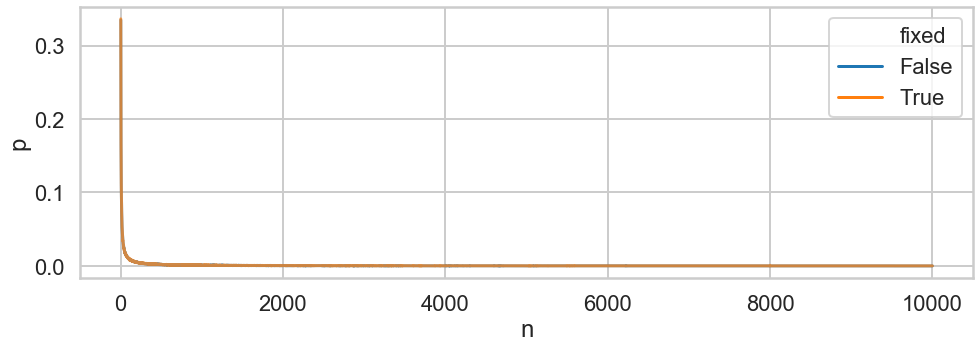

In [23]:
fig,ax = plt.subplots(figsize = (16,5))
ax = sns.lineplot(x = 'n',
                   y = 'p',
                   hue = 'fixed',
                   data = results,
                   ci = 'sd',
                   seed = 12345,
                   alpha = .7,
                   ax = ax,
                   )